In [1]:
# Import necessary libraries
import numpy as np
import os
from PIL import Image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.resnet import ResNet101, ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:


# Function to load and preprocess the dataset
def load_preprocessed_dataset(fname='elpv-dataset-1.0/labels.csv'):
    # Load the dataset
    data = np.genfromtxt(fname, dtype=['|S19', '<f8', '|S4'], names=['path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])

    # Define a function to preprocess the images
    def load_and_preprocess_image(fname):
        with Image.open(fname) as image:
            # Preprocess image for ResNet50
            image = image.convert('RGB')
            image = image.resize((224, 224))
            image = np.array(image)
            image = preprocess_input(image)  
            return image

    # Load and preprocess images
    dir = os.path.dirname(fname)
    images = np.array([load_and_preprocess_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    # Convert probabilities to categorical labels
    labels = to_categorical(np.round(probs * 3), num_classes=4)

    return images, labels, types

# Load and preprocess the dataset
images, labels, types = load_preprocessed_dataset()

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the ResNet50 model pre-trained on ImageNet data
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
def train_model(base_model):
#     base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    
    return history
    
model_list=[]
model_name_list=["ResNet50","ResNet101","ResNet152"]
model_list.append(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
model_list.append(ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
model_list.append(ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))

history_list=[]
for model,name in zip(model_list,model_name_list):
    print(name)
    history_list.append(train_model(model))


ResNet50
Epoch 1/10
66/66 [==============================] - 77s 861ms/step - loss: 0.8718 - accuracy: 0.6727 - val_loss: 0.7314 - val_accuracy: 0.7333
Epoch 2/10
66/66 [==============================] - 56s 848ms/step - loss: 0.7014 - accuracy: 0.7342 - val_loss: 0.6914 - val_accuracy: 0.7390
Epoch 3/10
66/66 [==============================] - 56s 859ms/step - loss: 0.6505 - accuracy: 0.7566 - val_loss: 0.6673 - val_accuracy: 0.7543
Epoch 4/10
66/66 [==============================] - 55s 836ms/step - loss: 0.6227 - accuracy: 0.7661 - val_loss: 0.6824 - val_accuracy: 0.7448
Epoch 5/10
66/66 [==============================] - 55s 839ms/step - loss: 0.5936 - accuracy: 0.7732 - val_loss: 0.6708 - val_accuracy: 0.7467
Epoch 6/10
66/66 [==============================] - 55s 834ms/step - loss: 0.5589 - accuracy: 0.7861 - val_loss: 0.6681 - val_accuracy: 0.7581
Epoch 7/10
66/66 [==============================] - 54s 826ms/step - loss: 0.5503 - accuracy: 0.7909 - val_loss: 0.6559 - val_accurac

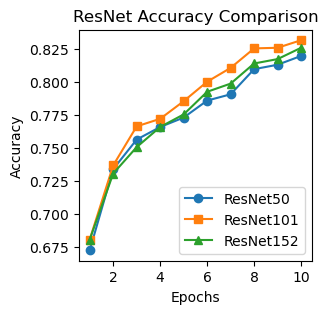

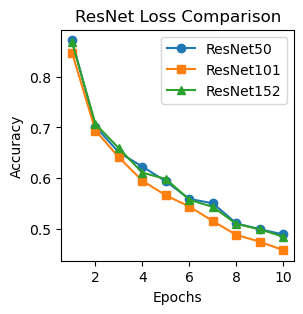

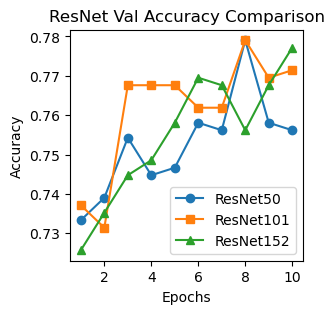

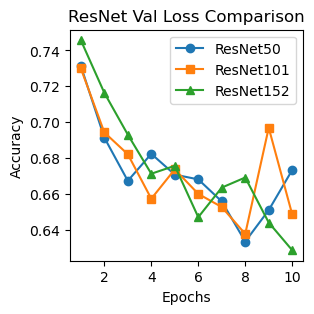

In [27]:
import matplotlib.pyplot as plt
x=[i+1 for i in range(0,10)]
accuracy_plt_list=[]
loss_plt_list=[]
val_loss_plt_list=[]
val_accuracy_plt_list=[]
for m in history_list:
#     print(m.history["accuracy"])
    accuracy_plt_list.append(m.history["accuracy"])
    loss_plt_list.append(m.history["loss"])
    val_loss_plt_list.append(m.history["val_loss"])
    val_accuracy_plt_list.append(m.history["val_accuracy"])

#     print(m.history["loss"])
#     print(m.history["val_loss"])
#     print(m.history["val_accuracy"])

plt.figure(figsize=(3, 3))  # Adjust figure size if needed

plt.plot(x, accuracy_plt_list[0], label='ResNet50', marker='o')
plt.plot(x, accuracy_plt_list[1], label='ResNet101', marker='s')
plt.plot(x, accuracy_plt_list[2], label='ResNet152', marker='^')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet Accuracy Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(3, 3))  # Adjust figure size if needed

plt.plot(x, loss_plt_list[0], label='ResNet50', marker='o')
plt.plot(x, loss_plt_list[1], label='ResNet101', marker='s')
plt.plot(x, loss_plt_list[2], label='ResNet152', marker='^')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet Loss Comparison')
plt.legend()
plt.show()


plt.figure(figsize=(3, 3))  # Adjust figure size if needed

plt.plot(x, val_accuracy_plt_list[0], label='ResNet50', marker='o')
plt.plot(x, val_accuracy_plt_list[1], label='ResNet101', marker='s')
plt.plot(x, val_accuracy_plt_list[2], label='ResNet152', marker='^')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet Val Accuracy Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(3, 3))  # Adjust figure size if needed

plt.plot(x, val_loss_plt_list[0], label='ResNet50', marker='o')
plt.plot(x, val_loss_plt_list[1], label='ResNet101', marker='s')
plt.plot(x, val_loss_plt_list[2], label='ResNet152', marker='^')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet Val Loss Comparison')
plt.legend()
plt.show()